# SIT744 Assignment 2: Deep Learning Project 

<div class="alert-info">
    <p>Due: <strong>8:00pm 29 May 2022</strong>  (Monday)</p>

This is an <strong>individual</strong> assignment. It contributes <strong>40%</strong> to your final mark. Read the assignment instruction carefully.

<h2> What to submit </h2>

<p>
This assignment is to be completed individually and submitted to CloudDeakin. <strong>By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin</strong>:

<ol>
<li>	<strong>[YourID]_assignment2_solution.ipynb</strong>:  This is your Python notebook solution source file. </li>
<li>	<strong>[YourID]_assingment2_output.html</strong> or <strong>[YourID]_assingment2_output.pdf</strong>: This is the output of your Python notebook solution <emph>exported</emph> in HTML or PDF format.</li>
<li>	Extra files needed to complete your assignment, if any (e.g., images used in your answers).</li>
</ol>
</p>

<p>
For example, if your student ID is: 123456, you will then need to submit the following files:
<ul>
<li> 123456_assignment2_solution.ipynb </li>
<li> 123456_assignment2_output.html</li>
</ul>
</p>

<h2> Warning </h2>

Some components of this assignment may involve heavy computation that runs for a long duration. Please start early to avoid missing the assignment due date.

<h2> Marking criteria </h2>

<p>
Your submission will be assessed based on the overall impact of your effort. A useful model (or application) should be your focus. But as in Assignment 1, we will also consider the following criteria at the same time.

<ul>
<li> Showing good effort through completed tasks.</li>
<li> Applying deep learning theory to design suitable deep learning solutions for the tasks.</li>
<li> Critically evaluating and reflecting on the pros and cons of various design decisions.</li>
<li> Demonstrating creativity and resourcefulness in providing unique individual solutions.</li>
<li> Showing attention to detail through a good quality assignment report.</li>
</ul>
</p>


</div>

## Assignment objective

This assignment is to feedback on your learning in deep learning theory and its application to  data analytics or artificial intelligence problems.  

It builds on Assignment 1 but requires a higher level of mastery of deep learning theory and programming/engineering skills. In particular, you will practice making design decisions yourself. You are also likely to encounter practical issues that will help you consolidate textbook learning. 

## **Task 1 (P Task) Smart Recycling using Deep Learning**

In Assignment 1, you tackled the image classification problem in Fashion-MNIST. There, you used a Densely Connected Neural Network. In Assignment 2, you will apply the best practices of deep-learning computer vision to make something useful for our planet—waste classification.

**Background** Every day, we put things into our recycle bin, to reduce landfill waste. However, we may unintentionally contribute to [recycling contamination](https://www.cleanaway.com.au/sustainable-future/contamination-main/) by "wish recycling" the wrong items. As every city council has slightly different rules for recycling, you will build a technological solution to ensure you only recycle things that are permitted by your local council. More discussions about recycling contamination can be found [here](https://www.cleanup.org.au/recycle).
![Recycling rule of a local council (source: Whitehorse City Council)](https://www.whitehorse.vic.gov.au/sites/whitehorse.vic.gov.au/files/assets/images/Recycle%20Right%20A3%20Poster.jpg "Recycling rule of a local council")

### Task 1.1 Define a problem

Define an image classification problem that may help people better recycle, particularly by reducing contamination.

Describe the desired inputs and outputs, including the target classes.

* Recycling contamination has been a global issue and these issue can be resolved easily through the use of Artificial Intelligence models.
* The purpose of this task is to categorize an image into a recyclable or non-recylclable items.
* The input of the model would be the images classified as organic(non-recyclable) and recyclable items.
* We will first train the models upon these two classification labels and test the model performance based on the output that has been classified.
* The output would basically be the classification labels of the model.
* Furthermore, we will perform various deep learning techniques to further improve and implement a real time solution for this problem.

### Task 1.2 Make a plan

What dataset can you use to develop a deep learning solution?

How many images do you need? How many for training? How many for testing?

Do you need to label the images yourself?

How do you determine if your model is good enough?

* We have adopted a waste classification data which is publicly available in kaggle (https://www.kaggle.com/datasets/techsash/waste-classification-data) to build the model.
* The image are categories into two directories named "O" and "R" where O is defined as organic and R is defined as Recyclable.
* The images are kept as train and test directories where the train set contains 22564 and test set contains 2513 of the above two classes.
* There is no need of labelling the data as we use an automated version to label the data using keras ImageDataGenerator packages which takes the directory name as the classes for the image.
* There are various ways of checking the model robustness which mainly includes first by looking at the loss function and accuracy of the model in both the train and validation set.
* Once we are okay with the model performence in the train set, then we will look into the test set performance of the model.

### Task 1.3 Implement a solution

Collect relevant data.
Develop a deep learning model.
Report the model performance against the success criteria that you define.

Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import os
import glob
from matplotlib.image import imread
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import datetime as dt

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

A function to get the train and test dataset along with distribution of data

In [2]:
def get_data(dir, t_size, b_size, kwargs_idg = {}, kwargs_ffd = {}):
    data_gen = ImageDataGenerator(rescale=1./255, **kwargs_idg)
    data = data_gen.flow_from_directory(os.path.join("archive/DATASET/","DATASET",dir), target_size=t_size, batch_size=b_size, **kwargs_ffd)
    return data

train = get_data("TRAIN", (64,64), 128, {"validation_split" : 0.1}, {"subset":"training"})
validation = get_data("TRAIN", (64,64), 128, {"validation_split" : 0.1}, {"subset":"validation"})
test = get_data("TEST", (64,64), 128)

Found 20309 images belonging to 2 classes.
Found 2255 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


Looking into number of classes in the data

In [3]:
train.class_indices

{'O': 0, 'R': 1}

Showing a total of fourty images from the training set

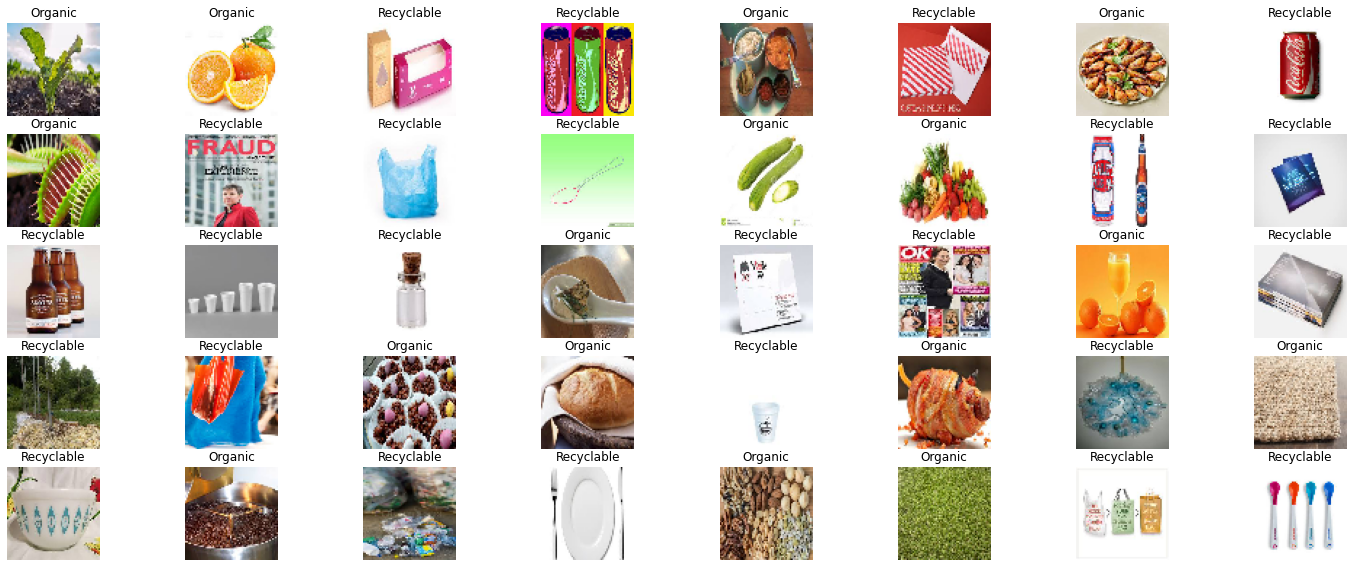

In [4]:
img_data, _= next(train)
plt.figure(figsize=(25, 16))
for j in range(40):
    ax = plt.subplot(8, 8, j + 1)
    plt.imshow(img_data[j])
    if _[j][1] == 0:
        plt.title("Organic")
    else:
        plt.title("Recyclable")
    plt.axis("off")
del img_data,_

Defining a model for the dataset

In [6]:
def model(input_size, data_aug = 0):
    
    model = tf.keras.Sequential()
    if data_aug == 1:
        data_augmentation = tf.keras.Sequential(
                                            [
                                                tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                                    input_shape=input_size),
                                                tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
                                                tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
                                                tf.keras.layers.experimental.preprocessing.RandomContrast(factor=(0.8, 1.4))
                                            ]
                                            )  
        model.add(data_augmentation)
    # Add convolutional layers
    model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=input_size))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, input_shape=input_size, activation="sigmoid"))
    
        
    model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l2=0.001)) )
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l2=0.001)))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))

    model.compile(optimizer='Nadam',loss='CategoricalCrossentropy', metrics=['accuracy'])
    
    return model


* We have opted for Convolutional Network to process the imageto extract certain patterns or features from images with an invariance in position, rotation, and scale.
* We have then added a flatten layer to convert the input data into one dimensional array before creating a fully connected layer.
* We then create a fully dense layer with 256 units as input and 2 units as the output which is our classification labels.
* Finally we compile the model using Nadam optimizer which is an extension to the Adam optimizer.
* Since this is a classification problem we used th eloss function as Categorical Cross entropy with the evaluation as accuracy metric.

Defining a tensorboard callback to look into the tensorboard profile and model analysis

In [7]:
# Create a TensorBoard callback
logs = "logs/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S")

tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')

Training the model

In [8]:
model_nn = model((64, 64, 3))
history = model_nn.fit(train, validation_data=validation, epochs=15, callbacks=[tboard_callback])

Epoch 1/15
159/159 [==============================] - 350s 2s/step - loss: 0.7437 - accuracy: 0.7533 - val_loss: 0.5052 - val_accuracy: 0.8333
Epoch 2/15
159/159 [==============================] - 248s 2s/step - loss: 0.5515 - accuracy: 0.8040 - val_loss: 0.4663 - val_accuracy: 0.8368
Epoch 3/15
159/159 [==============================] - 61s 384ms/step - loss: 0.4881 - accuracy: 0.8168 - val_loss: 0.4046 - val_accuracy: 0.8541
Epoch 4/15
159/159 [==============================] - 44s 274ms/step - loss: 0.4384 - accuracy: 0.8329 - val_loss: 0.4241 - val_accuracy: 0.8501
Epoch 5/15
159/159 [==============================] - 127s 799ms/step - loss: 0.3966 - accuracy: 0.8506 - val_loss: 0.3777 - val_accuracy: 0.8594
Epoch 6/15
159/159 [==============================] - 65s 411ms/step - loss: 0.3645 - accuracy: 0.8608 - val_loss: 0.3623 - val_accuracy: 0.8674
Epoch 7/15
159/159 [==============================] - 41s 260ms/step - loss: 0.3312 - accuracy: 0.8770 - val_loss: 0.3786 - val_accur

Model Summary

In [9]:
model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7688)              0         
                                                                 
 dense (Dense)               (None, 256)               1968384   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                        

Model Accuracy Visualization

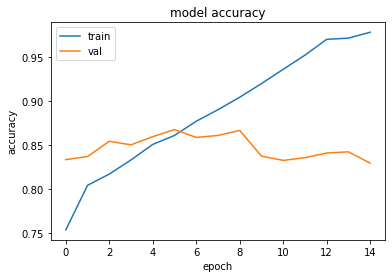

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

* Here we can see the accuracy is increasing over each epochs during the training set.
* The validation set accuracy has very less fluctuation with the values being between 0.83 - 0.87.

## **Task 2 (C Task) Analyse and improve the model**

### Task 2.1 Build an input pipeline for data augmentation


Build a data preprocessing pipeline to perform data augmentation. (You may use Keras ImageDataGenerator or write your own transformations.)

- Report the model performance with the pipeline added. How much performance gain have you achieved?    

- Profile your input pipeline to identify the most time-consuming operation. What actions have you taken to address that slow operation? (*Hint: You may use a profiler such as the [TensorFlow Profiler](https://github.com/tensorflow/profiler).*)


Training the model using data augumentation

In [11]:
new_model = model((64,64,3), 1)
history_new = new_model.fit(train, validation_data=validation, epochs=15, callbacks=[tboard_callback])

Epoch 1/15
159/159 [==============================] - 157s 956ms/step - loss: 0.7359 - accuracy: 0.7603 - val_loss: 0.5332 - val_accuracy: 0.8377
Epoch 2/15
159/159 [==============================] - 100s 630ms/step - loss: 0.5693 - accuracy: 0.7929 - val_loss: 0.4610 - val_accuracy: 0.8435
Epoch 3/15
159/159 [==============================] - 40s 248ms/step - loss: 0.5162 - accuracy: 0.7968 - val_loss: 0.4294 - val_accuracy: 0.8333
Epoch 4/15
159/159 [==============================] - 45s 281ms/step - loss: 0.4894 - accuracy: 0.7977 - val_loss: 0.4030 - val_accuracy: 0.8435
Epoch 5/15
159/159 [==============================] - 42s 264ms/step - loss: 0.4691 - accuracy: 0.8022 - val_loss: 0.3914 - val_accuracy: 0.8479
Epoch 6/15
159/159 [==============================] - 36s 224ms/step - loss: 0.4531 - accuracy: 0.8054 - val_loss: 0.3967 - val_accuracy: 0.8439
Epoch 7/15
159/159 [==============================] - 32s 204ms/step - loss: 0.4466 - accuracy: 0.8080 - val_loss: 0.3960 - val_

Model Summary

In [12]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 64, 64, 3)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 8)         224       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 8)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7688)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               1968384   
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                      

Visualizing the Training and Validation Accuracy

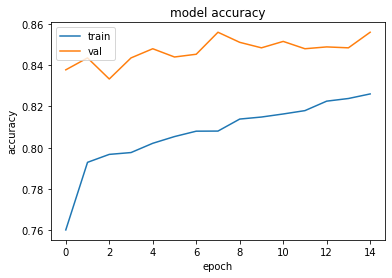

In [13]:
plt.plot(history_new.history['accuracy'])
plt.plot(history_new.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

* The data augumentation step includes Flipping, Rotation, Zooming and Contrasting.
* We then used these step in the sequential model that we created earlier.

In [14]:

# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [15]:
# Launch TensorBoard and navigate to the Profile tab to view performance profile
%tensorboard --logdir=logs

### Task 2.2 Compare the performance under equal training time

You may notice that with your pipeline, the model performance improves, but at the cost of a longer training time per epoch. Is the additional training time well spent? Compare the dynamic of model performance (e.g., classification accuracy on the test data) with and without data augmentation, when equal training time is spent in the two scenarios. 

Model evaluation without Data Augumentation

In [14]:
score = model_nn.evaluate(test, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.5492393374443054
Test accuracy 0.8320732116699219


Model evaluation with Data Augumentation

In [15]:
score_da = new_model.evaluate(test, verbose=0)
print('Test with DA Loss', score_da[0])
print('Test with DA accuracy', score_da[1])

Test with DA Loss 0.37655389308929443
Test with DA accuracy 0.844011127948761


* Model without DA achieved a test loss of 0.5492 and accuracy of 0.8320 on the test dataset where as the model with DA achieved a test loss of 0.37655and accuracy of 0.84401.
* Comparison of the two models indicates that the model with DA performed better in both test loss and accuracy.
* Lower test loss in model with DA indicates that it predicted more accurately then the other model and high accuracy denotes that the model classified the data classes more accurately.
* The improvement of the model with DA is due to the data augumentation implementation due to additional training data involvement by applying various transformations.

### Task 2.3 Identifying model strength and weakness

Identify images that are incorrectly classified by your model. Do they share something in common? How do you plan to improve the model's performance on those images? 

Actual vs Predicted wiothout DA

4/4 [==============================] - 0s 8ms/step


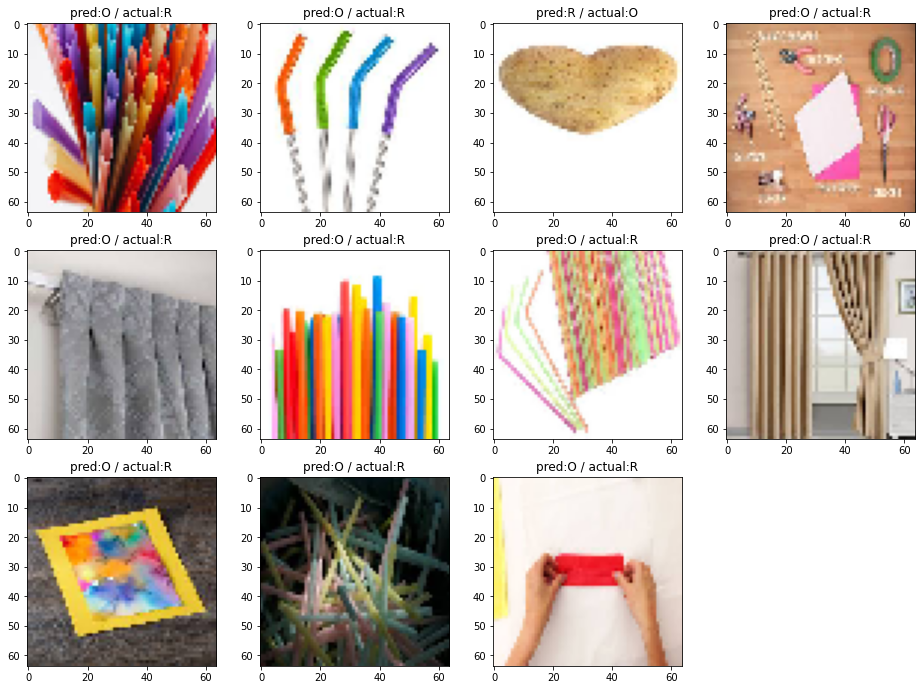

In [16]:
test_x, test_y = test.__getitem__(1)

labels = (test.class_indices)
labels = dict((v,k) for k,v in labels.items())

preds = model_nn.predict(test_x)

plt.figure(figsize=(16, 16))
j=0
for i in range(64):
    
    if labels[np.argmax(preds[i])]!=labels[np.argmax(test_y[i])]:
        plt.subplot(4, 4, j+1)
        plt.title('pred:%s / actual:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
        plt.imshow(test_x[i])
        j = j+1

Actual vs Predicted With DA

4/4 [==============================] - 0s 8ms/step


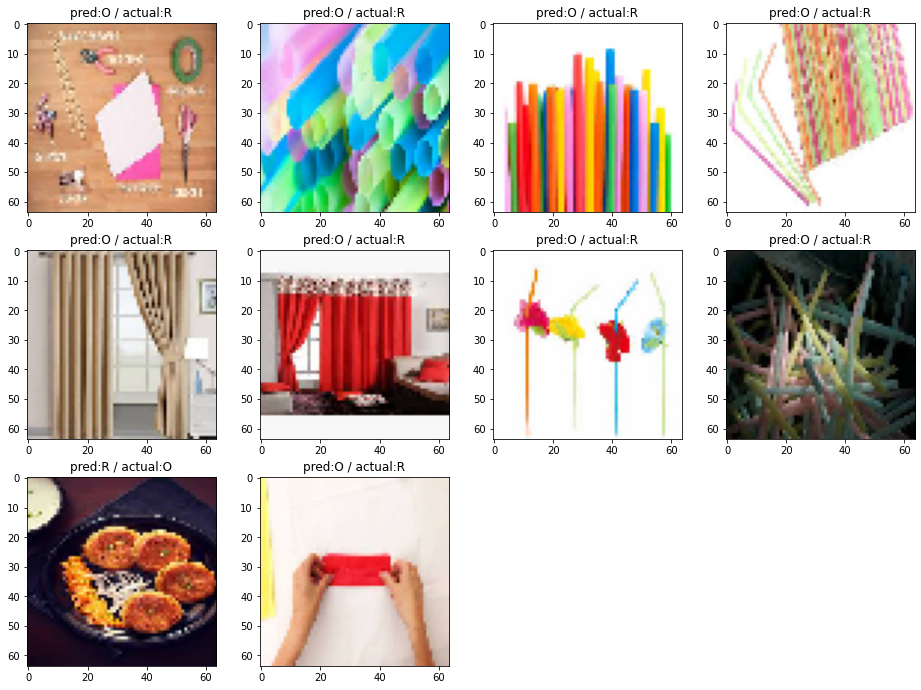

In [17]:
test_x, test_y = test.__getitem__(1)

labels = (test.class_indices)
labels = dict((v,k) for k,v in labels.items())

preds = new_model.predict(test_x)

plt.figure(figsize=(16, 16))
j=0
for i in range(64):
    
    if labels[np.argmax(preds[i])]!=labels[np.argmax(test_y[i])]:
        plt.subplot(4, 4, j+1)
        plt.title('pred:%s / actual:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
        plt.imshow(test_x[i])
        j = j+1

* For the model without DA we could see a lot of item being misclassified especially the one with color red or orange. This is due to the fact that we have trained a lot of items as organic using carrot images which indicates that similar color or contrast items are also classified as carrot item.
* We also have very few images of curtains that were trained and in our result we could see more of curtain items misclassified.
* For the model with DA we could see some imporvements in the data with the use of data augumentation techniques but still few items are misclassified.
* To imporve these models we can adopt the following steps:
    * Increasing the model capacity which is th number of layers, units or parameters.
    * Gathering more data especially for curtains and images with high red or orange colour contrast.
    * Applying regularisation techniques to improve the model.

## **Task 3 (D Task) Improve model generalisability across domains**

So far, you have used training and test images from the same source (via random data split). Now collect new test images from a different source. For example, you may take some photos yourself if you used downloaded images before.
Otherwise, you may take new photos using a different mobile phone or against a different background.

Show sample images from the original test data and the newly collected test data. In what ways are they different?

Feed the new test data into your model. Report the performance change.

Improve your model so that it generalises better on unseen test images.


* We have added additional data from different data sources as a test set to look into our model robustness. (https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification)

Generating the data

In [18]:
test_new = get_data("NEWTEST", (64,64), 128)

Found 1523 images belonging to 2 classes.


Visualizing a sample of test dataset

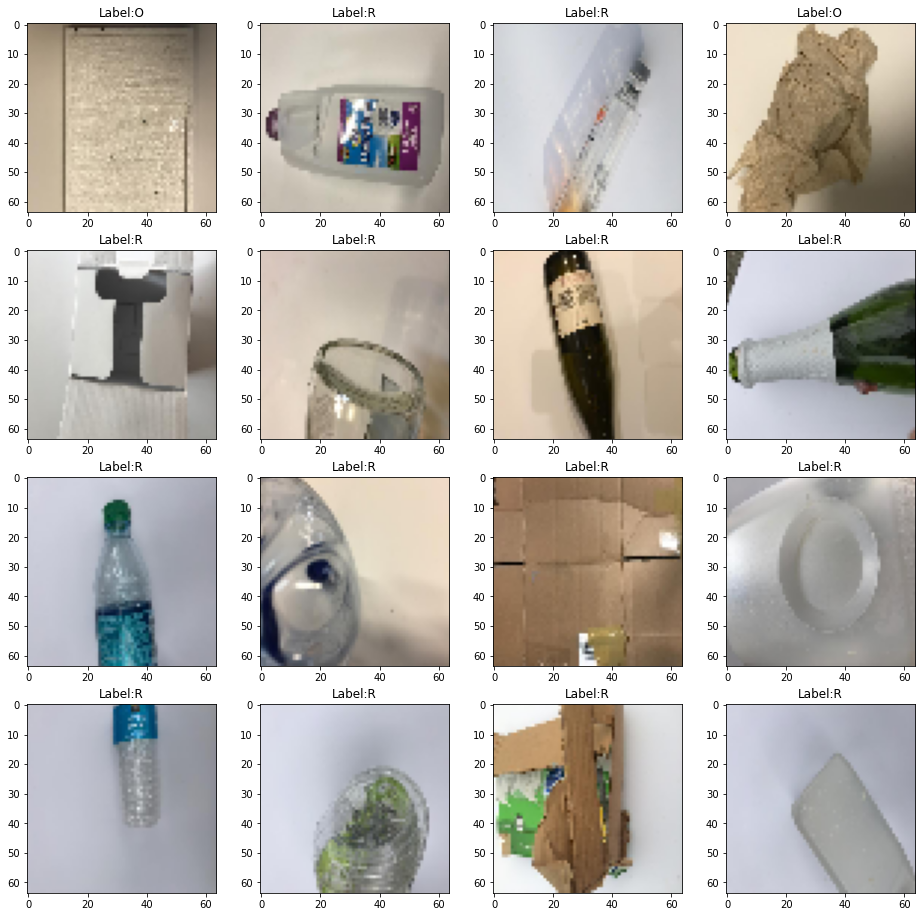

In [19]:
test_new_x, test_new_y = test_new.__getitem__(1)

labels_new = (test_new.class_indices)
labels_new = dict((v,k) for k,v in labels_new.items())

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('Label:%s' % (labels[np.argmax(test_new_y[i])]))
    plt.imshow(test_new_x[i])

Evaluating model without DA performance

In [20]:
score_new = model_nn.evaluate(test_new, verbose=0)
print('New Test', score_new[0])
print('New Test', score_new[1])

New Test 0.746645450592041
New Test 0.7071569561958313


Evaluating model with DA performance

In [21]:
score_new_da = new_model.evaluate(test_new, verbose=0)
print('New Test with DA Loss', score_new_da[0])
print('New Test with DA accuracy', score_new_da[1])

New Test with DA Loss 0.7233662009239197
New Test with DA accuracy 0.6178594827651978


* Both the model hasnot turned out to be a good modle for the new data set that we used.
* The loss accuracy is very high in the model without DA but the model accuracy is higher then the model with DA.
* We will be applying some regularization techniques to see if we could bring down the loss and improve accuracy.

Actual vs Predicted without DA

4/4 [==============================] - 0s 8ms/step


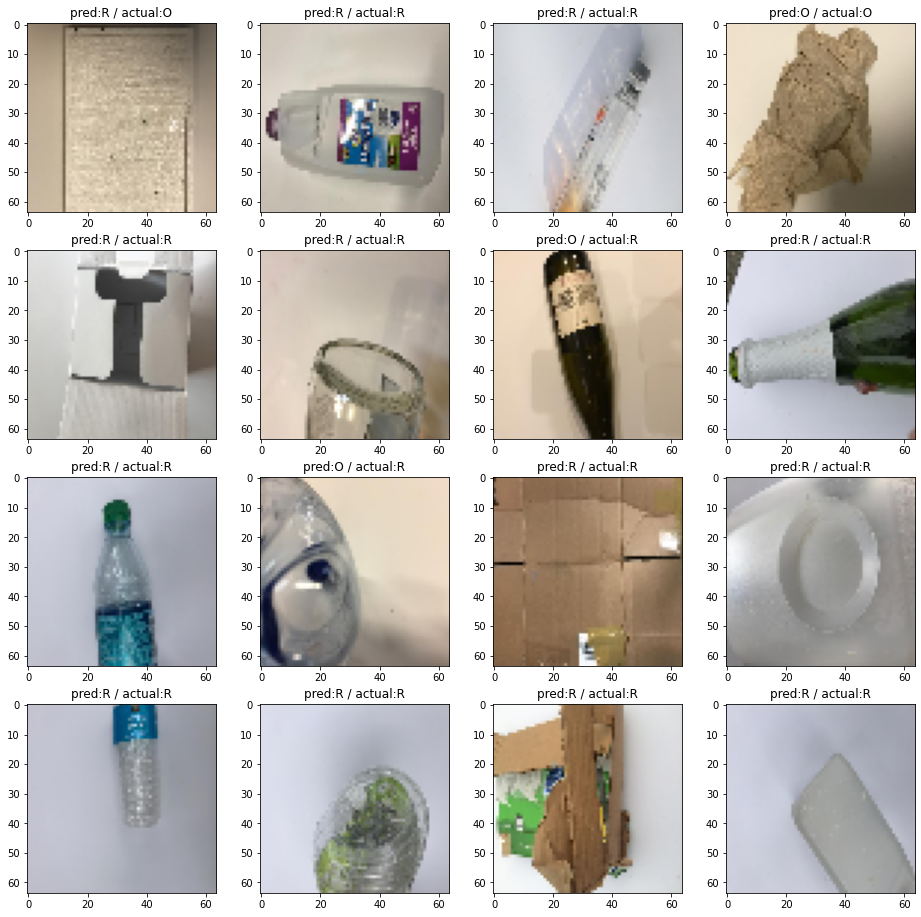

In [22]:
preds = model_nn.predict(test_new_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / actual:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_new_y[i])]))
    plt.imshow(test_new_x[i])

Actual vs Predicted with DA

4/4 [==============================] - 0s 8ms/step


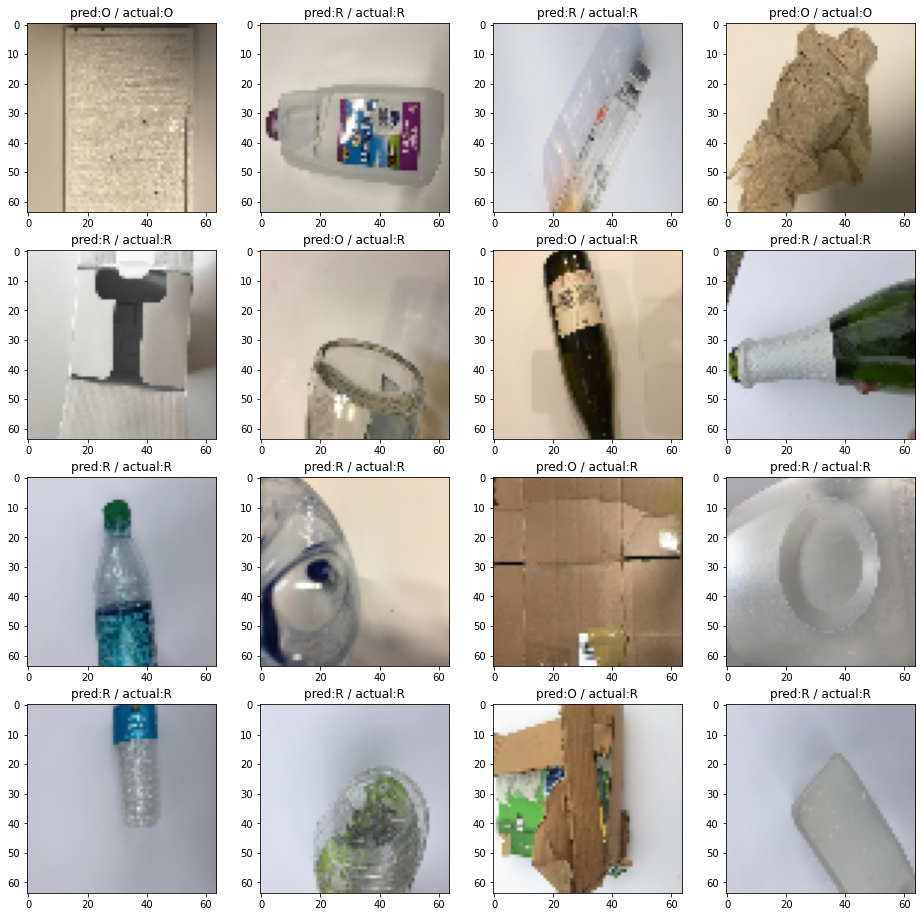

In [23]:
preds = new_model.predict(test_new_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / actual:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_new_y[i])]))
    plt.imshow(test_new_x[i])

Applying Batch Normalization to our model to imporve the model performence

In [24]:
def model_improve(input_size, data_aug = 0):
    
    model = tf.keras.Sequential()
    if data_aug == 1:
        data_augmentation = tf.keras.Sequential(
                                            [
                                                tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                                    input_shape=input_size),
                                                tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
                                                tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
                                                tf.keras.layers.experimental.preprocessing.RandomContrast(factor=(0.8, 1.4))
                                            ]
                                            )  
        model.add(data_augmentation)
    # Add convolutional layers
    model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=input_size))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(256, input_shape=input_size, activation="sigmoid")) # Input Layer
    
        
    model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l2=0.001)) )
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l2=0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(2, activation='softmax'))

    model.compile(optimizer='Nadam',loss='CategoricalCrossentropy', metrics=['accuracy'])
    
    # print(model.summary())
    return model


In [25]:
imp_model = model_improve((64,64,3))
history_new_imp = imp_model.fit(train, validation_data=validation, epochs=15, callbacks=[tboard_callback])

Epoch 1/15
159/159 [==============================] - 223s 1s/step - loss: 0.7621 - accuracy: 0.8115 - val_loss: 0.7315 - val_accuracy: 0.8053
Epoch 2/15
159/159 [==============================] - 63s 395ms/step - loss: 0.5635 - accuracy: 0.8575 - val_loss: 0.6765 - val_accuracy: 0.7778
Epoch 3/15
159/159 [==============================] - 39s 243ms/step - loss: 0.4324 - accuracy: 0.8920 - val_loss: 0.5489 - val_accuracy: 0.8302
Epoch 4/15
159/159 [==============================] - 44s 276ms/step - loss: 0.3198 - accuracy: 0.9236 - val_loss: 0.5993 - val_accuracy: 0.8186
Epoch 5/15
159/159 [==============================] - 44s 274ms/step - loss: 0.2348 - accuracy: 0.9491 - val_loss: 0.7486 - val_accuracy: 0.7734
Epoch 6/15
159/159 [==============================] - 42s 262ms/step - loss: 0.1805 - accuracy: 0.9633 - val_loss: 0.7226 - val_accuracy: 0.8089
Epoch 7/15
159/159 [==============================] - 122s 772ms/step - loss: 0.1483 - accuracy: 0.9698 - val_loss: 0.7027 - val_acc

Model accuracy on the test set of the original dataset

In [26]:
score_new = imp_model.evaluate(test, verbose=0)
print('New Test', score_new[0])
print('New Test', score_new[1])

New Test 0.7943583726882935
New Test 0.8312773704528809


Model accuracy on new data set

In [27]:
score_new = imp_model.evaluate(test_new, verbose=0)
print('New Test', score_new[0])
print('New Test', score_new[1])

New Test 0.8945891857147217
New Test 0.8154957294464111


* After applying the batch normalization we finally have a improve model.
* Both on test set and new data set the accuracy is turned out to be above 80%.

Saving the current model as the best model

In [29]:
tf.keras.models.save_model(imp_model,'best_model.h5')

## **Task 4 (HD Task) Build a workable prototype**

Build a web/mobile app that people from your city council can use to determine what to recycle. Test your prototype with the target users and report their feedback.

Upload your code into a GitHub repository.

Create a short video presentation about your product.

---
**END OF ASSIGNMENT TWO**